# Plots

This file demonstrates how to create plots in Julia by using the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package.

The notebook uses the default backend (GR), but Plots.jl supports several alternatives. (See the package document for details.)

See [Plots Gallery](https://docs.juliaplots.org/dev/gallery/gr/) for examples (with code snippets available by clicking on a figure).

The [StatsPlots.jl](https://github.com/JuliaPlots/StatsPlots.jl) package (not discussed here) defines various statistical plots. It is about to be integrated into Plots.jl.

## Load Packages and Extra Functions

In [1]:
using Dates, Plots

default(size = (480,320),fmt = :png)   #:svg gives prettier plots, but may not work well on GitHub
#pythonplot()                          #to use another backend

# A First Plot

The next cell creates and shows a first plot.

The first plot takes a bit of time. Subsequent plots are much quicker.

The `savefig()` command (see below) saves the plot to a graphics file.

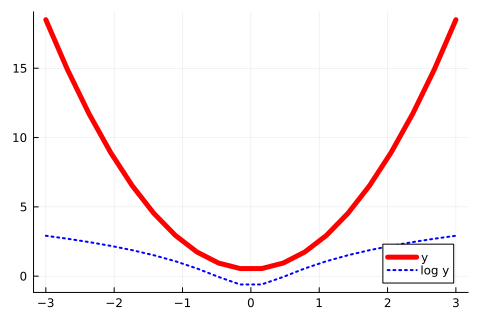

In [2]:
x = range(-3,3,length=20)      #something to plot
y = 2*x.^2 .+ 0.5

p1 = plot( x,[y log.(y)],                 #same x axis
           label = ["y" "log y"],
           linecolor = [:red :blue],
           linestyle = [:solid :dot],
           linewidth = [5 2] )
display(p1)       #not needed in notebook, but useful in script, not needed with pytonplot

In [3]:
plotattr("linestyle")             #see all available options

:linestyle

Style of the line (for path and bar stroke). Choose from [:auto, :solid, :dash, :dot, :dashdot, :dashdotdot]

Aliases: (:linestyles, :ls, :s, :style).

Type: Symbol.

`Series` attribute, defaults to `solid`.


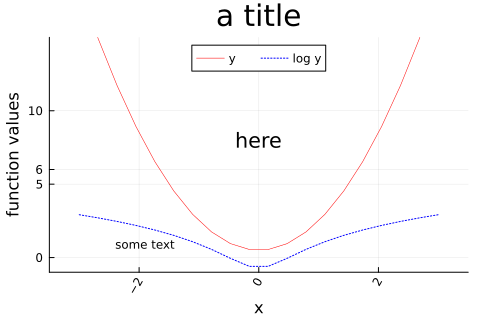

In [4]:
#now with title, labels and more

p1 = plot( x,[y log.(y)],
           label = ["y" "log y"],
           legendcolumns = 2,
           legend = :top,
           linecolor = [:red :blue],
           linestyle = [:solid :dot],
           linewidth = [0.5 1],
           title = "a title",
           titlefontsize = 20,
           xlabel = "x",
           ylabel = "function values",
           xrotation = 60,
           xlims = (-3.5,3.5),
           ylims = (-1,15),
           xticks = [-2;0;2],
           yticks = [0;5;6;10],
           annotation = ([-1.9,0],[0.9,8],[text("some text",8),"here"]) )
display(p1)

In [5]:
savefig("AFirstPlot.pdf");              #change to .svg or .png
println("Check that the graphics file is now in the same folder as the notebook.")

Check that the graphics file is now in the same folder as the notebook.


# Plotting a Function

...can also be done by, for instance, ` plot(log,0,2.71)`. This plots the `log(x)` function for `x`  from 0 to 2.71.

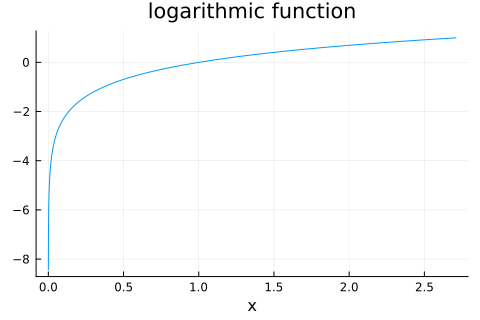

In [6]:
p1 = plot( log,0,2.71,
           legend=false,
           title = "logarithmic function",
           xlabel = "x" )
display(p1)

# Subplots

Use ```layout = (2,2)``` to create a 2x2 plot and `layout = @layout[a a;a _]` to create a 2x2 plot where the last subplot is blank. In the latter case, `a` just indicates that there should be a visible subplot (you could use another symbol, eg `b`), while `_` indicates that the subpot should be blank.

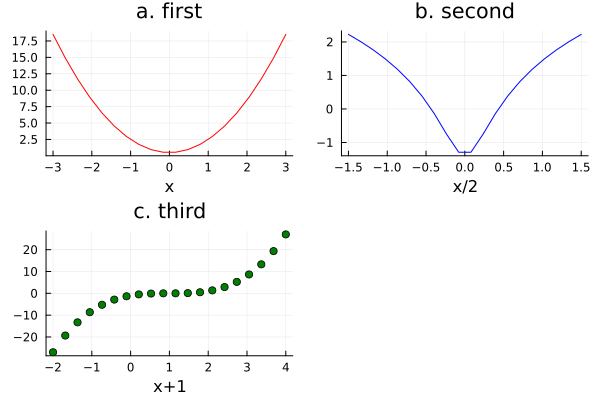

In [7]:
p1 = plot( x,y,                  #define subplot 1
           linecolor = :red,
           title = "a. first",
           xlabel = "x",
           legend = false )

p2 = plot( x/2,log.(y/2),
           linecolor = :blue,
           title = "b. second",
           xlabel = "x/2",
           legend = false )

p3 = scatter( x.+1,x.^3,
              markercolor = :green,
              title = "c. third",
              xlabel = "x+1",
              legend = false )

pAll = plot( p1,p2,p3,                    #combine the subplots
             layout = @layout[a a;a _],
             size = (600,400) )
display(pAll)

# Adding Lines (Horizontal, Vertical and More)

and changing the x-tick marks.

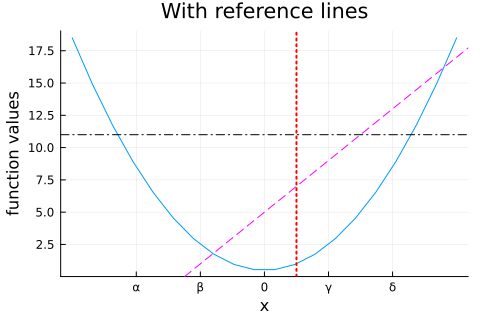

In [8]:
xtickStr = ["α","β","0","γ","δ"]

p1 = plot( x,y,
           legend = false,
           title = "With reference lines",
           xlabel = "x",
           ylabel = "function values",
           xticks = (-2:2,xtickStr) )

vline!([0.5],linecolor=:red,line=(:dot,2))   #easiest to not integrate this in plot()
hline!([11],linecolor=:black,line=:dashdot)
Plots.abline!(4,5,linecolor=:magenta,line=:dash)  #yes, it currently needs the Plots. prefix
display(p1)

# LaTeX in the Figure

`gr()` can include LaTeX elements. Such strings need to be just LaTeX code, so you need a work-around to combine it with text: see `title` in the cell below. In particular, notice that `\mathrm{}` creates ordinary text and that `\` gives a space. To make all text (including tick labels etc) use the traditional TeX font, use `fontfamily="Computer Modern"`.

To insert the value of the variable `z` into the LaTeX string ("string interpolation"), use `%$z` instead of the standard `$z`.

(You may also consider using the `pythonplot()` backend which has extensive support for LaTeX.)

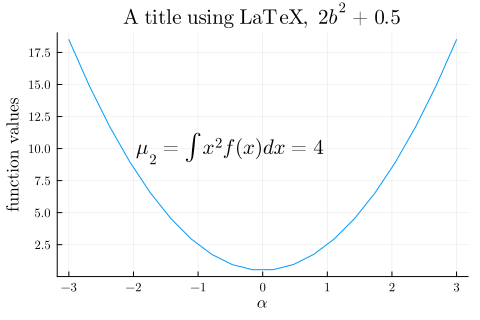

In [9]:
using LaTeXStrings                 #add some LaTeX to the figure

z = 4                             #a value to be used inside the string

p1 = plot( x,y,legend = false,
           title = L"$\mathrm{A \ title \ using \ LaTeX,\ } 2 b^2 + 0.5$",
           xlabel = L"$\alpha$",
           ylabel = "function values",
           annotation = (-0.5,10,L"$\mu_2 = \int x^2 f(x) dx = %$z $"),  #notice the % in %$z
           fontfamily = "Computer Modern" ) #comment out this if it does not work
display(p1)

In [10]:
savefig("ASecondPlot.pdf");

# Bars and Stairs Plots

(For the `bar()` plot, the option `orientation=:h` makes the bars horizontal instead.)

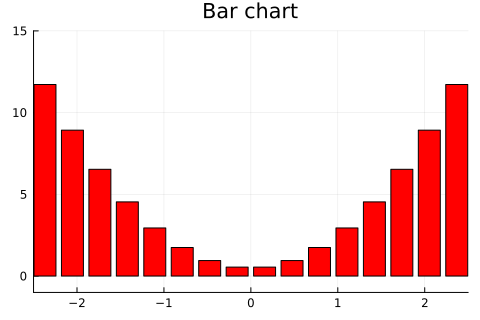

In [11]:
p1 = bar( x,y,
          legend = false,
          fillcolor = :red,
          xlims = (-2.5,2.5),
          ylims = (-1,15),
          title = "Bar chart" )
display(p1)

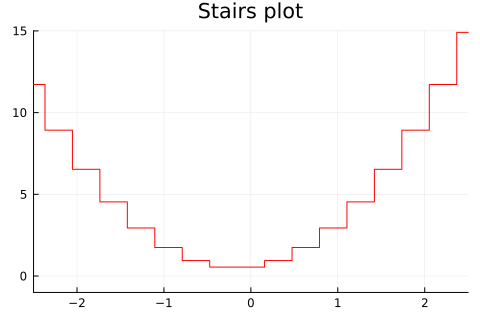

In [12]:
p1 = plot( x,y,
           linetype = :steppre,
           linecolor = :red,
           legend = false,
           xlims = (-2.5,2.5),
           ylims = (-1,15),
           title = "Stairs plot" )
display(p1)

# Surface Plots

The `camera = (60,30)` in the second figure rotates the figure.

(20,)(25,)(25, 20)


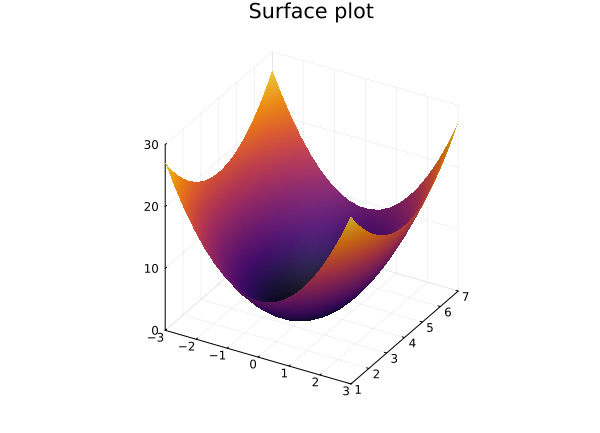

In [13]:
x = range(-3,3,length=20)       #create some "data" to plot
y = range(1,7,length=25)
z = 2*x.^2 .+ (y' .-4).^2

#notice the arguments: x,y,z'
println(size(x),size(y),size(z'))

p1 = surface( x,y,z',
              size = (600,433),
              legend = false,
              xlims = (-3,3),
              ylims = (1,7),
              zlims = (0,30),
              title = "Surface plot" )
display(p1)

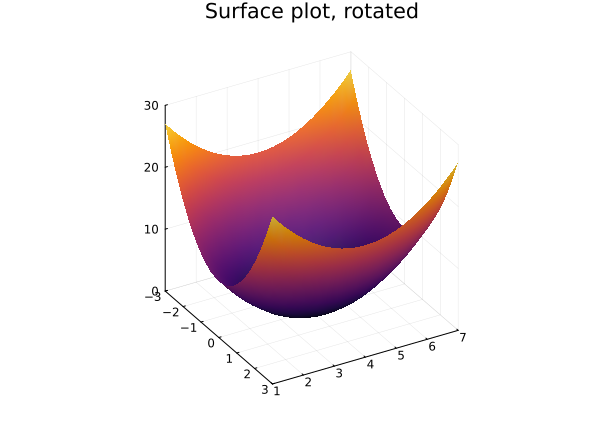

In [14]:
p1 = surface( x,y,z',
              size = (600,433),
              camera = (60,30),
              legend = false,
              xlims = (-3,3),
              ylims = (1,7),
              zlims = (0,30),
              title = "Surface plot, rotated" )
display(p1)

# Contour Plot

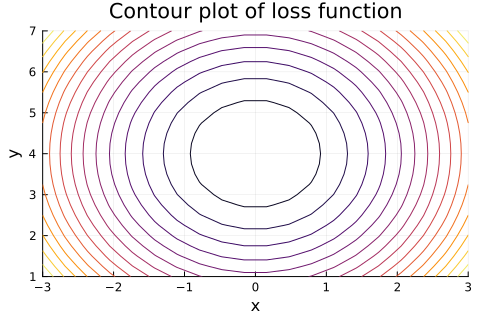

In [15]:
p1 = contour(x,y,z',                 #notice the transpose: z'
            legend = false,
            title = "Contour plot of loss function",
            xlabel = "x",
            ylabel = "y")
display(p1)

# Scatter and Histogram

Scatter plots allows many customisations, for instance, to let the marker size vary across data points (see `markersize`).

For the histogram, `normalize = true` makes the area equal to one, so the histogram becomes directly compapable to a probability density function.

In [16]:
plotattr("markershape")                #to see available options

:markershape

Choose from [:none, :auto, :circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x].

Aliases: (:markershapes, :shape).

Type: Union{Symbol, Shape, AbstractVector}.

`Series` attribute, defaults to `none`.


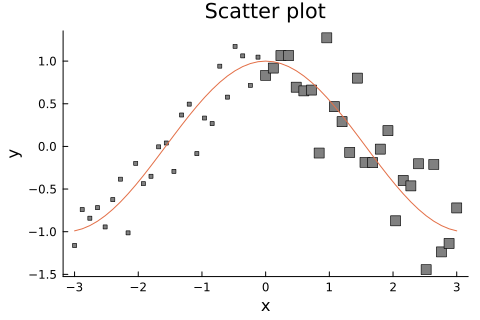

In [17]:
N = 51
x = range(-3,3,length=N)
y = cos.(x) + randn(N)/3

ms = vcat(2*ones(25),5*ones(N-25))      #marker size, N or a scalar

p1 = scatter( x,y,
              markersize = ms,
              markercolor = :grey,
              markershape = :rect,
              legend = false,
              grid = false,
              title = "Scatter plot",
              xlabel = "x",
              ylabel = "y" )
plot!(x,cos.(x))
display(p1)

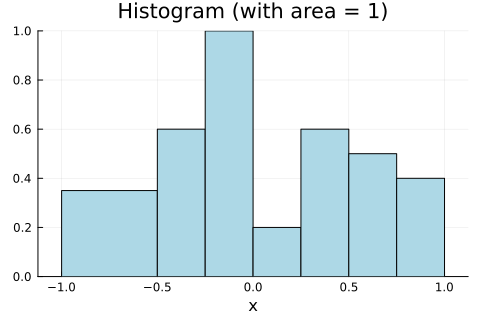

In [18]:
bins = vcat([-1,-0.5],-0.5:0.25:1)   #bins for the histogram, here of different sizes (for illustration)

p1 = histogram( y,
                bins = bins,
                normalize = true,
                fillcolor = :lightblue,
                ylims = (0,1),    
                legend = false,
                title = "Histogram (with area = 1)",
                xlabel = "x" )
display(p1)

# Time Series Plots

We can use a `Date()` vector as the x-axis variable.

To insert lines, annotations and tick marks, the $x$ values are defined as, for instance, `Date(2016,8,15)`. 

It is often useful to configure the printing of the dates (shorter, not too many). This is done in the second figure.

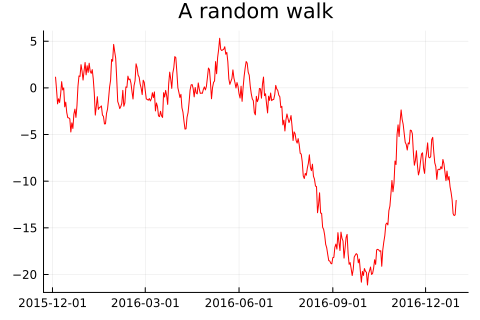

In [19]:
dN = Date(2015,12,4):Day(1):Date(2016,12,31)   #just faking some dates
y  = randn(length(dN))                               #some random numbers to plot

p1 = plot( dN,cumsum(y),
           linecolor = :red,
           legend = false,
           title = "A random walk" )
display(p1)

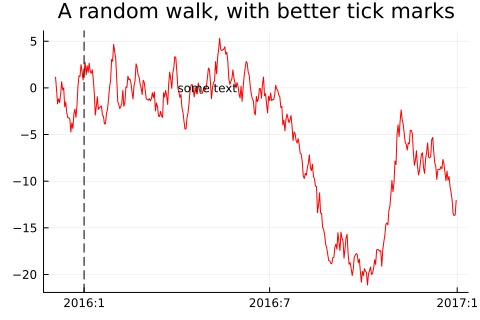

In [20]:
xTicksLoc = [Date(2016,1),Date(2016,7),Date(2017,1)]
xTicksLab = Dates.format.(xTicksLoc,"Y:m")    #see Dates.format for more options

p1 = plot( dN,cumsum(y),
           linecolor = :red,
           legend = false,
           xticks = (xTicksLoc,xTicksLab),
           title = "A random walk, with better tick marks",
           annotation = (Date(2016,5),0,text("some text",8)) )

vline!([Date(2016)],linecolor=:black,line=(:dash,1))
display(p1)

# Animations

The following cell animates the probability density function (pdf) of a normally distributed variable $x$ with mean $x_0+m \mu$ and variance $m \sigma^2$ as $m$ increases. 

(Background: this shows how the distribution of a random walk with drift would change as the horizon $m$ is extended. This is, for instance, used in pricing of options which expire at different horizons.)

Plots.AnimatedGif("C:\\Users\\PSoderlind\\PSDataE\\JL\\JuliaTutorial\\tmp.gif")
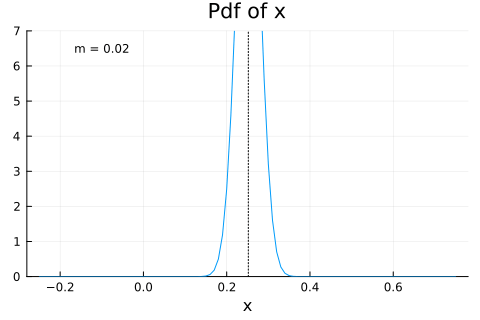

In [21]:
using Distributions

(x₀,μ,σ) = (0.25,0.1,0.2)               #parameters of the N() distribution

x       = range(-0.25,0.75,length=101)
m_range = range(1/52,1/2,step=1/52)     #different horizons

anim = @animate for m in m_range        #create an animation, like a loop
    dist = Normal(x₀+m*μ,sqrt(m*σ^2))     #computations
    pdf_m = pdf.(dist,x)
    txt = "m = $(round(m,digits=2))"
    plot(x,pdf_m,                         #create the plot
         ylims = (0,7),
         title = "Pdf of x",
         xlabel = "x",
         annotation = (-0.1,6.5,text(txt,8)),
         legend = false)
         vline!([x₀+m*μ],linecolor=:black,line=(:dot,1))
end

gif(anim; fps=7,show_msg=false)        #show the animation

# Plot Themes (extra)

...to give the entire plot another style.

 See [the Plots documentation on colors](https://docs.juliaplots.org/stable/generated/colorschemes/) for instructions on how to change colours, and [PlotsThemes](https://docs.juliaplots.org/stable/generated/plotthemes/) for changing the overall plot theme (to dark, say).

In [22]:
using PlotThemes
theme(:lime)

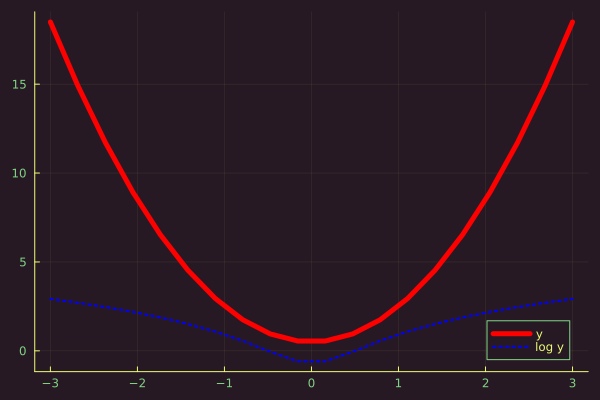

In [23]:
x = range(-3,3,length=20)      #something to plot
y = 2*x.^2 .+ 0.5

p1 = plot( [x x],[y log.(y)],
           label = ["y" "log y"],
           linecolor = [:red :blue],
           linestyle = [:solid :dot],
           linewidth = [5 2] )
display(p1)